### Importar librerías

In [66]:
import requests
import pandas as pd
import warnings
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

### Ubicar a los humanos

Ya sabemos que en el dataset de especies hay una variable que se llama 'people' que contiene un listado de urls de todos los personajes de tal o cual especie, en este caso vamos a tomar a los humanos.

In [46]:
response_species = requests.get('https://ghibliapi.vercel.app/species')
response_species.raise_for_status()
species_data = response_species.json()



df_species = pd.DataFrame.from_dict(species_data)
df_species.head(3)

,id,name,classification,eye_colors,hair_colors,people,films,url
0,af3910a6-429f-4c74-9ad5-dfe1c4aa04f2,Human,Mammal,"Black, Blue, Brown, Grey, Green, Hazel","Black, Blonde, Brown, Grey, White",[https://ghibliapi.vercel.app/people/ba924631-...,[https://ghibliapi.vercel.app/films/2baf70d1-4...,https://ghibliapi.vercel.app/species/af3910a6-...
1,6bc92fdd-b0f4-4286-ad71-1f99fb4a0d1e,Deer,Elk,"Black, Red","Brown, Light Orange",[https://ghibliapi.vercel.app/people/030555b3-...,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/6bc92fdd-...
2,b5a92d0e-5fb4-43d4-ba60-c012135958e4,Spirit,Spirit,Red,Light Orange,[https://ghibliapi.vercel.app/people/ca568e87-...,[https://ghibliapi.vercel.app/films/0440483e-c...,htps://ghibliapi.vercel.app/species/b5a92d0e-5...


In [47]:
human_species = [species for species in species_data if species['name'] == 'Human']
#human_species


### Crear una lista con los links de los personajes humanos AKA personas

In [48]:
character_links = human_species[0]['people']
character_links

['https://ghibliapi.vercel.app/people/ba924631-068e-4436-b6de-f3283fa848f0',
 'https://ghibliapi.vercel.app/people/e9356bb5-4d4a-4c93-aadc-c83e514bffe3',
 'https://ghibliapi.vercel.app/people/34277bec-7401-43fa-a00a-5aee64b45b08',
 'https://ghibliapi.vercel.app/people/91939012-90b9-46e5-a649-96b898073c82',
 'https://ghibliapi.vercel.app/people/20e3bd33-b35d-41e6-83a4-57ca7f028d38',
 'https://ghibliapi.vercel.app/people/8bccdc78-545b-49f4-a4c8-756163a38c91',
 'https://ghibliapi.vercel.app/people/116bfe1b-3ba8-4fa0-8f72-88537a493cb9',
 'https://ghibliapi.vercel.app/people/986faac6-67e3-4fb8-a9ee-bad077c2e7fe',
 'https://ghibliapi.vercel.app/people/d5df3c04-f355-4038-833c-83bd3502b6b9',
 'https://ghibliapi.vercel.app/people/3031caa8-eb1a-41c6-ab93-dd091b541e11',
 'https://ghibliapi.vercel.app/people/87b68b97-3774-495b-bf80-495a5f3e672d',
 'https://ghibliapi.vercel.app/people/08ffbce4-7f94-476a-95bc-76d3c3969c19',
 'https://ghibliapi.vercel.app/people/0f8ef701-b4c7-4f15-bd15-368c7fe38d0a',

### Hacer una consulta de todos los links obtenidos y armar un df

In [49]:
human_characters_info = [] #diccionario vacío para llenar con los datos


for character_link in character_links:
    character_response = requests.get(character_link)
    if character_response.status_code == 200:
        character_data = character_response.json()
        human_characters_info.append(character_data)# Agregar la información del personaje al diccionario
    else:
        print(f'No se pudo obtener la información del personaje: {character_link}')


len(human_characters_info)



23

In [50]:
human_characters_info

[{'id': 'ba924631-068e-4436-b6de-f3283fa848f0',
  'name': 'Ashitaka',
  'gender': 'Male',
  'age': 'late teens',
  'eye_color': 'Brown',
  'hair_color': 'Brown',
  'films': ['https://ghibliapi.vercel.app/films/0440483e-ca0e-4120-8c50-4c8cd9b965d6'],
  'species': 'https://ghibliapi.vercel.app/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2',
  'url': 'https://ghibliapi.vercel.app/people/ba924631-068e-4436-b6de-f3283fa848f0'},
 {'id': 'e9356bb5-4d4a-4c93-aadc-c83e514bffe3',
  'name': 'Moro',
  'gender': 'Female',
  'age': '300',
  'eye_color': 'Brown',
  'hair_color': 'White',
  'films': ['https://ghibliapi.vercel.app/films/0440483e-ca0e-4120-8c50-4c8cd9b965d6'],
  'species': 'https://ghibliapi.vercel.app/species/f25fa661-3073-414d-968a-ab062e3065f7',
  'url': 'https://ghibliapi.vercel.app/people/e9356bb5-4d4a-4c93-aadc-c83e514bffe3'},
 {'id': '34277bec-7401-43fa-a00a-5aee64b45b08',
  'name': 'Eboshi',
  'gender': 'Female',
  'age': 'Unspecified/Adult',
  'eye_color': 'Hazel',
  'hair_color

## Aquí me encontré un errorcito en la base de datos del API. 

En teoría todos los url de 'species' deberían ser iguales para todos los personajes de una misma especie, pero en una inspección rápida vi que el personaje "Moro" tiene un link diferente. 

Voy a crear una condición en la que si se encuentra un url diferente al de la especie humana en la columna 'species' elimine ese elemento de la lista

In [51]:
for character in range(len(human_characters_info)):
    if human_characters_info[character]['species'] != 'https://ghibliapi.vercel.app/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2':
        del human_characters_info[character]
        break

len(human_characters_info)

22

In [52]:
human_characters_info # Lista con diccionarios de puros humanos ahora sí

[{'id': 'ba924631-068e-4436-b6de-f3283fa848f0',
  'name': 'Ashitaka',
  'gender': 'Male',
  'age': 'late teens',
  'eye_color': 'Brown',
  'hair_color': 'Brown',
  'films': ['https://ghibliapi.vercel.app/films/0440483e-ca0e-4120-8c50-4c8cd9b965d6'],
  'species': 'https://ghibliapi.vercel.app/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2',
  'url': 'https://ghibliapi.vercel.app/people/ba924631-068e-4436-b6de-f3283fa848f0'},
 {'id': '34277bec-7401-43fa-a00a-5aee64b45b08',
  'name': 'Eboshi',
  'gender': 'Female',
  'age': 'Unspecified/Adult',
  'eye_color': 'Hazel',
  'hair_color': 'Black',
  'films': ['https://ghibliapi.vercel.app/films/0440483e-ca0e-4120-8c50-4c8cd9b965d6'],
  'species': 'https://ghibliapi.vercel.app/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2',
  'url': 'https://ghibliapi.vercel.app/people/34277bec-7401-43fa-a00a-5aee64b45b08'},
 {'id': '91939012-90b9-46e5-a649-96b898073c82',
  'name': 'Jigo',
  'gender': 'Male',
  'age': 'Middle age',
  'eye_color': 'Black',
  'hair_

### Convertir a DataFrame para obtener información que nos ayude a crear a nuestro Ghibliano promedio

In [53]:
df_humans = pd.DataFrame.from_dict(human_characters_info)
df_humans.head(3)


,id,name,gender,age,eye_color,hair_color,films,species,url
0,ba924631-068e-4436-b6de-f3283fa848f0,Ashitaka,Male,late teens,Brown,Brown,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/ba924631-0...
1,34277bec-7401-43fa-a00a-5aee64b45b08,Eboshi,Female,Unspecified/Adult,Hazel,Black,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/34277bec-7...
2,91939012-90b9-46e5-a649-96b898073c82,Jigo,Male,Middle age,Black,Brown,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/91939012-9...


## Análisis exploratorio de datos

Primero vamos a buscar celdas vacías y a revisar los tipos de datos

In [54]:
NAN_values = df_humans.isnull().sum()
print (NAN_values)

id            0
name          0
gender        0
age           0
eye_color     0
hair_color    0
films         0
species       0
url           0
dtype: int64


In [55]:
df_humans.dtypes

id            object
name          object
gender        object
age           object
eye_color     object
hair_color    object
films         object
species       object
url           object
dtype: object

Eso no me dio mucha información, voy a revisar los valores de los datos por columna.
Vamos a definir una funcioncita que permita hacerlo al mismo tiempo para todas las columnas que se necesitan.

In [56]:
def print_group_sizes(df, column_name):
    group_sizes = df.groupby(column_name).size()
    print(group_sizes)
    print("____________________")

df_columns = ['gender', 'age', 'eye_color', 'hair_color']

for column in df_columns:
    print_group_sizes(df_humans, column)

gender
Female    13
Male       9
dtype: int64
____________________
age
10                   2
11                   2
13                   2
18                   1
26                   1
37                   1
4                    1
60                   1
Adult                3
Elder                1
Middle age           1
NA                   3
Over 50              1
Unspecified/Adult    1
late teens           1
dtype: int64
____________________
eye_color
Black               8
Blue                1
Brown               8
Cyan                1
Dark Brown/Black    1
Grey                1
Hazel               1
NA                  1
dtype: int64
____________________
hair_color
Bald, but beard is Brown    1
Black                       1
Blonde                      1
Blue                        1
Brown                       8
Dark Brown                  3
Dirty Blond                 1
Grey                        1
Light Brown                 1
Light Gray                  1
Red                

## Hay muchísima heterogeneridad en los datos

Pero por el dataset de species sabemos que los valores de eye_color y hair_color deben ser "eye_colors": "Black, Blue, Brown, Grey, Green, Hazel" y  "hair_colors": "Black, Blonde, Brown, Grey, White. Vamos a apegarnos a ese criterio,

In [57]:
eye_color_dict = {
    'Black': 'Black',
    'Blue': 'Blue',
    'Brown': 'Brown',
    'Cyan': 'Blue',
    'Dark Brown/Black': 'Brown',
    'Grey': 'Grey',
    'Hazel': 'Hazel',
    'NA': 'NA'
}

# Reemplazar los valores en la columna 'eye_color' según el diccionario
df_humans['eye_color'] = df_humans['eye_color'].map(eye_color_dict)

hair_color_dict = {
    'Black': 'Black',
    'Bald, but beard is Brown': 'Brown',
    'Blue': 'Blue',
    'Brown': 'Brown',
    'Blonde': 'Blond',
    'Dirty Blond': 'Blond',
    'Dark Brown': 'Brown',
    'Light Brown': 'Brown',
    'Grey': 'Grey',
    'Light Grey': 'Grey',
    'Reddish brown': 'Brown',
    'White': 'White'
}

# Reemplazar los valores en la columna 'hair_color' según el diccionario
df_humans['hair_color'] = df_humans['hair_color'].map(hair_color_dict)

df_humans.head(3)

,id,name,gender,age,eye_color,hair_color,films,species,url
0,ba924631-068e-4436-b6de-f3283fa848f0,Ashitaka,Male,late teens,Brown,Brown,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/ba924631-0...
1,34277bec-7401-43fa-a00a-5aee64b45b08,Eboshi,Female,Unspecified/Adult,Hazel,Black,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/34277bec-7...
2,91939012-90b9-46e5-a649-96b898073c82,Jigo,Male,Middle age,Black,Brown,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/91939012-9...


El caso de las edades es un caso particular, porque tiene tanto valores númericos que deberían considerarse como integers y categorías que deben ser strings. Para resolver esto primero voy a definir un set de categorías que incluyan las edades manifestadas y voy a asignar los valores a una de estas categorías

In [58]:
df_humans['age_category'] = ''  # Creamos una coluna nueva para definir en qué etapa de su vida está

for i in range(len(df_humans)):
    age = df_humans.loc[i, 'age']
    
    try:
        age_int = int(age)
        
        # Creamos un if statement para validar la edad y catalogarlo adecuadamente
        if age_int < 13:
            category = 'Child'
        elif 13 <= age_int < 16:
            category = 'Teen'
        elif 16 <= age_int < 18:
            category = 'Late teen'
        elif 18 <= age_int < 40:
            category = 'Adult'
        elif 40 <= age_int < 60:
            category = 'Middle Age'
        else:
            category = 'Elder'

        # Asignamos las nuevas categorías a la columna correspondiente
        df_humans.at[i, 'age_category'] = category

    except ValueError:
        df_humans.at[i, 'age_category'] = age


#df_humans

In [59]:
age_category = df_humans.groupby('age_category').size()
print(age_category)

age_category
Adult                6
Child                5
Elder                2
Middle age           1
NA                   3
Over 50              1
Teen                 2
Unspecified/Adult    1
late teens           1
dtype: int64


Genial, ya tenemos algo más parecido a lo que hicimos con hair_color y eye_color; podemos homologarlo un poquito más

In [60]:
age_category_dict = {
    'Adult': 'Adult',
    'Child': 'Child',
    'Elder': 'Elder',
    'Middle age': 'Middle age',
    'NA': 'NA',
    'Over 50': 'Middle age',
    'Teen': 'Teen',
    'Unspecified/Adult': 'Adult',
    'late teens': 'Teen'
}

# Reemplazar los valores en la columna 'hair_color' según el diccionario
df_humans['age_category'] = df_humans['age_category'].map(age_category_dict)

df_humans.head(3)


,id,name,gender,age,eye_color,hair_color,films,species,url,age_category
0,ba924631-068e-4436-b6de-f3283fa848f0,Ashitaka,Male,late teens,Brown,Brown,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/ba924631-0...,Teen
1,34277bec-7401-43fa-a00a-5aee64b45b08,Eboshi,Female,Unspecified/Adult,Hazel,Black,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/34277bec-7...,Adult
2,91939012-90b9-46e5-a649-96b898073c82,Jigo,Male,Middle age,Black,Brown,[https://ghibliapi.vercel.app/films/0440483e-c...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/91939012-9...,Middle age


In [61]:
df_columns = ['gender', 'age_category', 'eye_color', 'hair_color']

for column in df_columns:
    print_group_sizes(df_humans, column)

gender
Female    13
Male       9
dtype: int64
____________________
age_category
Adult         7
Child         5
Elder         2
Middle age    2
NA            3
Teen          3
dtype: int64
____________________
eye_color
Black    8
Blue     2
Brown    9
Grey     1
Hazel    1
NA       1
dtype: int64
____________________
hair_color
Black     1
Blond     2
Blue      1
Brown    14
Grey      1
White     1
dtype: int64
____________________


Ya con los datos arregladitos veo que hay 3 NA en age category y 1 en eye color, esta situación me tenía intrigada así que decidí investigar:
Los culpables de estos registros son 3 personajes de una película que se llama "Earwig and the Witch" y son los personajes Bella Yaga (Una señora yo diría cincuentona), Mandrake (Un señor igual cincuentón y que aparte lleva lentes que le cubren los ojos) y Custard (un niño).

Como ya tengo categorías de edad, voy a asignar los valores correspondientes a cada caso y el del color de ojos se queda en NA


In [62]:
print(df_humans.loc[df_humans['age_category'] == 'NA'])

                                      id        name  gender age eye_color  \
19  56c94dae-3290-472f-ad2e-0a6444956b51  Bella Yaga  Female  NA     Brown   
20  5caa6a3c-7d44-47d1-afc6-12fffad28889    Mandrake    Male  NA        NA   
21  835f8c7c-2fc6-4f54-b545-c02ab066cd69     Custard    Male  NA      Blue   

   hair_color                                              films  \
19       Blue  [https://ghibliapi.vercel.app/films/790e0028-a...   
20      Brown  [https://ghibliapi.vercel.app/films/790e0028-a...   
21      Blond  [https://ghibliapi.vercel.app/films/790e0028-a...   

                                              species  \
19  https://ghibliapi.vercel.app/species/af3910a6-...   
20  https://ghibliapi.vercel.app/species/af3910a6-...   
21  https://ghibliapi.vercel.app/species/af3910a6-...   

                                                  url age_category  
19  https://ghibliapi.vercel.app/people/56c94dae-3...           NA  
20  https://ghibliapi.vercel.app/people/5caa6a3

In [63]:
df_humans.at[19, 'age_category'] = 'Middle age'
df_humans.at[20, 'age_category'] = 'Middle age'
df_humans.at[21, 'age_category'] = 'Child'


Hermoso, ahora sí, a armar a nuestro Ghibliano promedio

## Selección de características

In [65]:
df_humans.tail(3)

,id,name,gender,age,eye_color,hair_color,films,species,url,age_category
19,56c94dae-3290-472f-ad2e-0a6444956b51,Bella Yaga,Female,NA,Brown,Blue,[https://ghibliapi.vercel.app/films/790e0028-a...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/56c94dae-3...,Middle age
20,5caa6a3c-7d44-47d1-afc6-12fffad28889,Mandrake,Male,NA,NA,Brown,[https://ghibliapi.vercel.app/films/790e0028-a...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/5caa6a3c-7...,Middle age
21,835f8c7c-2fc6-4f54-b545-c02ab066cd69,Custard,Male,NA,Blue,Blond,[https://ghibliapi.vercel.app/films/790e0028-a...,https://ghibliapi.vercel.app/species/af3910a6-...,https://ghibliapi.vercel.app/people/835f8c7c-2...,Child


Vamos a generar unas gráficas de pastel para apreciar la distribución de nuestras características: Color de cabello y ojos, género y grupo de edad

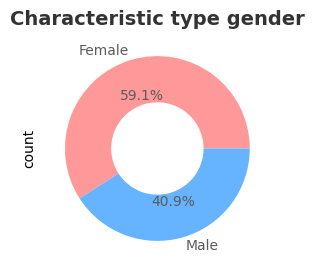

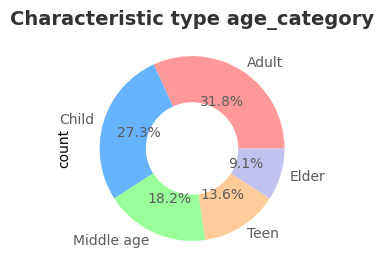

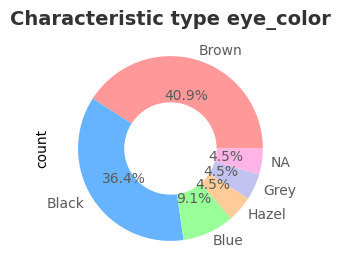

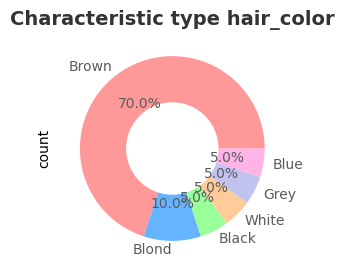

In [83]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
plt.style.use('seaborn-v0_8-pastel')

df_columns = ['gender', 'age_category', 'eye_color', 'hair_color']

for i in df_columns:
    characteristic = df_humans[i].value_counts()
    
    # Crear el gráfico de pastel
    characteristic.plot(kind='pie',
                        autopct='%1.1f%%',
                        colors=colors,
                        wedgeprops=dict(width=0.5),
                        textprops=dict(color="#5b5b5b"))

    plt.title(f'Characteristic type {i}', color='#333333', fontsize=14, fontweight='bold')
    
    # Ajustar el tamaño del gráfico y mostrar
    figure = plt.gcf()
    figure.set_size_inches(3,3)
    plt.show()